# **Riduzione della dimensionalità**

Un dataset molto grande in genere può portare a due problematiche:
- difficoltà di visualizzazione e difficoltà di selezione delle feature
- tendenza all'***overfitting***

Soprattutto nei modelli di classificazione può tornare utile un metodo che da una parte riduce le dimesnioni del dataset sintetizzando due o più feature in una, dall'altra mantiene la coerenza del dataset evitando di perdere informzioni necessarie.

# **PCA (Principal Component Analysis)**

Uno degli algoritmi più utilizzati è l'**analisi dei componenti principali**.
Come suggerisce il nome, il suo obiettivo è quello di sintetizzare l’informazione fornita dalle variabili di un dataset in pochi fattori, detti  ***componenti principali***.

Usiamo per  l'occazione uno dei dataset di sklearn che contiene dati sulla produzione di vino.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 


X,y = datasets.load_wine(return_X_y=True, as_frame=True)
display(X)
display(y)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

Le etichette ***target*** contengono le classi di vino associate a 14 feature ognuna contenente 178 valori. 

Come dimensione dei dati abbiamo già qualcosa di complicato da gestire già solo in fase di visualizzazione. 

Proviamo a ridurre il dataset comprimendo il tutto in un nuovo set di feature di ridotte di numero. 


**N.B.** Prima di applicare la PCA, asscirurarsi sempre di scalare le feature.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

display(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


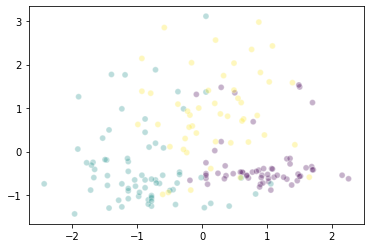

In [11]:
plt.scatter(X[0], X[1], alpha=0.3, edgecolors='w',c=y)
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

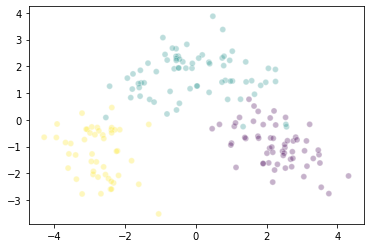

In [9]:
df_pca_X = pd.DataFrame(X_pca)
plt.scatter(df_pca_X[0], df_pca_X[1], alpha=0.3, edgecolors='w',c=y)